In [ ]:
import torch

In [ ]:
class ECDF(torch.nn.Module):
    def __init__(self, x, side='right'):
        super(ECDF, self).__init__()

        if side.lower() not in ['right', 'left']:
            msg = "side can take the values 'right' or 'left'"
            raise ValueError(msg)
        self.side = side

        if len(x.shape) != 1:
            msg = 'x must be 1-dimensional'
            raise ValueError(msg)

        x = x.sort()[0]
        nobs = len(x)
        y = torch.linspace(1./nobs, 1, nobs, device=x.device)

        self.x = torch.cat((torch.tensor([-torch.inf], device=x.device), x))
        self.y = torch.cat((torch.tensor([0], device=y.device), y))
        self.n = self.x.shape[0]

    def forward(self, time):
        tind = torch.searchsorted(self.x, time, side=self.side) - 1
        return self.y[tind]

In [ ]:
x1 = torch.randn(5)
x2 = torch.rand(5)

In [ ]:
ecdf_fn = ECDF(x1)
ecdf_fn

In [ ]:
ecdf_fn(x1)

In [ ]:
ecdf_fn(x2)

In [ ]:
sample = [6.23, 5.58, 7.06, 6.42, 5.20]

In [ ]:
from scipy import stats
res = stats.ecdf(sample)


In [ ]:
quantiles = res.cdf.quantiles

In [ ]:

probabilities = res.cdf.probabilities

In [ ]:
import matplotlib.pyplot as plt
ax = plt.subplot()
res.cdf.plot(ax)

In [ ]:
plt.plot(quantiles, probabilities)

In [ ]:
from statsmodels.distributions.empirical_distribution import (
    StepFunction)

In [ ]:
import numpy as np 
x = np.arange(20)
y = np.arange(20)
f = StepFunction(x, y)

In [ ]:
f

In [ ]:
f2 = StepFunction(x, y, side='right')

In [ ]:
f(-1.)

In [ ]:
f(100)

In [ ]:
from statsmodels.distributions.empirical_distribution import ECDF

In [ ]:
ecdf = ECDF([3, 3, 1, 4])

In [ ]:
ecdf([3, 55, 0.5, 1.5])

In [ ]:
class ECDFPyTorch(torch.nn.Module):
    def __init__(self, x, weights=None, side='right'):
        super(ECDFPyTorch, self).__init__()

        if side.lower() not in ['right', 'left']:
            msg = "side can take the values 'right' or 'left'"
            raise ValueError(msg)
        self.side = side

        if len(x.shape) != 1:
            msg = 'x must be 1-dimensional'
            raise ValueError(msg)

        
        nobs = len(x)
        if weights is not None:
            assert len(weights) == nobs
            sweights = torch.sum(weights)
            assert sweights > 0.
            sorted = torch.argsort(x).int()
            x = x[sorted]
            y = torch.cumsum(weights[sorted], dim=0)
            y = y / sweights
            self.x = torch.cat((torch.tensor([-torch.inf], device=x.device), x))
            self.y = torch.cat((torch.tensor([0], device=y.device), y))
            self.n = self.x.shape[0]        

        else:
            x = torch.sort(x)[0]
            y = torch.linspace(1./nobs, 1, nobs, device=x.device)
            self.x = torch.cat((torch.tensor([-torch.inf], device=x.device), x))
            self.y = torch.cat((torch.tensor([0], device=y.device), y))
            self.n = self.x.shape[0]

    def forward(self, time):
        tind = torch.searchsorted(self.x, time, side=self.side) - 1
        return self.y[tind]

In [ ]:
x = torch.tensor([3, 3, 1, 4])

ewcdf = ECDFPyTorch(x)

In [ ]:
ewcdf

In [ ]:
z = torch.tensor([3, 55, 0.5, 1.5])

In [ ]:
ewcdf(z)

In [ ]:
t = torch.tensor([1,2,2,2,3])
ewcdf = ECDFPyTorch(t)
print(np.vstack((ewcdf.x,ewcdf.y)))


In [ ]:
x1 = torch.tensor([3, 1, 4])
weights = torch.tensor([1.25, 2.5, 5])
ewcdf = ECDFPyTorch(x1, weights=weights)

In [ ]:

z = torch.tensor([3, 55, 0.5, 1.5])
ewcdf(z)

In [ ]:
ewcdf.x, ewcdf.y

In [ ]:
sample1 = torch.tensor([3.5, 3.5, 1.5, 1, 4])
sample2 = torch.tensor([3.5, 1.5, 1, 4])
weights2 = torch.tensor([2, 1, 1, 1])
e1 = ECDF(sample1)
e2 = ECDF(sample2, weights=weights2)

In [ ]:
from statsmodels.distributions.empirical_distribution import (
ECDF,
ECDFDiscrete,
)

In [ ]:
xnumpy = np.array([-3, 4, -3, 60., 2, 3, 2])
xtensor = torch.tensor(xnumpy)
# weightsnumpy = np.array([1, 2, 0, 0, 5, 1, 3]) # n_samples = 12
weightsnumpy = [1, 2, 0, 0, 5, 1, 3]
weightstensor = torch.tensor(weightsnumpy)

znumpy = np.array([-10, 5, 1.5])
ztensor = torch.tensor(znumpy)

In [ ]:
ecdf_stats = ECDF(xnumpy)
ecdf_torch = ECDFPyTorch(xtensor)

In [ ]:
ecdf_stats(znumpy)

In [ ]:
ecdf_torch(ztensor)

In [ ]:
# weighted_ecdf_stats = ECDF(xnumpy, weightsnumpy)
weighted_ecdf_torch = ECDFPyTorch(xtensor, weightstensor)

In [ ]:
weighted_ecdf_torch(ztensor)

In [ ]:
weighted_ecdf_stats = ECDF(xnumpy, weightsnumpy)

In [ ]:
a = torch.tensor([ 0.0785,  1.5267, -0.8521,  0.4065])

In [ ]:
# sorted = 2, 0, 3, 1,

torch.argsort(a).int()

In [ ]:
b = a[torch.argsort(a).int()]
b

In [ ]:
(2 * torch.tensor(3)).size()

In [4]:
import torch
a = torch.normal(mean=0., std=1., size=(3,))

In [5]:
a

tensor([0.9082, 0.7408, 1.9725])

In [8]:
len(a)

3

In [10]:
a.Size()

AttributeError: 'Tensor' object has no attribute 'Size'

In [13]:
print(a.size())

torch.Size([3])


In [12]:
print(type(a))

<class 'torch.Tensor'>


In [14]:
import torch

def main():

    x = [[[[0, 0, 0, 0],
           [0, 1, 1, 0],
           [0, 1, 1, 0],
           [0, 0, 0, 0]],

         [[1, 0, 0, 1],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [1, 0, 0, 1]]]]

    x = torch.tensor(x).float()

    m = [[[[10, 11, 12, 13],
           [14, 15, 16, 17],
           [18, 19, 20, 21],
           [22, 23, 24, 25]],

          [[26, 27, 28, 29],
           [30, 31, 32, 33],
           [34, 35, 36, 37],
           [38, 39, 40, 41]]]]

    m = torch.tensor(m).float()

    y, idx = torch.nn.functional.max_pool2d_with_indices(x, kernel_size=(2, 2))

    m_select = torch.take(m, idx)
    print(m_select)


if __name__ == "__main__":
    main()

tensor([[[[15., 16.],
          [19., 20.]],

         [[10., 13.],
          [22., 25.]]]])


In [15]:
x = [[[[0, 0, 0, 0],
           [0, 1, 1, 0],
           [0, 1, 1, 0],
           [0, 0, 0, 0]],

         [[1, 0, 0, 1],
          [0, 0, 0, 0],
          [0, 0, 0, 0],
          [1, 0, 0, 1]]]]

x = torch.tensor(x).float()

m = [[[[10, 11, 12, 13],
           [14, 15, 16, 17],
           [18, 19, 20, 21],
           [22, 23, 24, 25]],

          [[26, 27, 28, 29],
           [30, 31, 32, 33],
           [34, 35, 36, 37],
           [38, 39, 40, 41]]]]

In [16]:
m = torch.tensor(m).float()

y, idx = torch.nn.functional.max_pool2d_with_indices(x, kernel_size=(2, 2))

In [17]:
out = torch.gather(torch.flatten(m, 2), 2, torch.flatten(idx, 2)).view(idx.size())
print(out)


tensor([[[[15., 16.],
          [19., 20.]],

         [[26., 29.],
          [38., 41.]]]])


In [18]:
poly_batched = torch.tensor([[1, 2, 3, 4], [1, 2, 3, 4]])

def polycompanion(polynomial):
    deg = polynomial.shape[-1] - 2
    companion = torch.zeros((deg+1, deg+1))
    companion[1:,:-1] = torch.eye(deg)
    _companion = torch.concatenate([companion[:, :-1].clone(), (-1. * polynomial[:-1] / polynomial[-1])[:, None]], dim=1)
    return _companion

polycompanion_vmap = torch.vmap(polycompanion)
print(polycompanion_vmap(poly_batched))

tensor([[[ 0.0000,  0.0000, -0.2500],
         [ 1.0000,  0.0000, -0.5000],
         [ 0.0000,  1.0000, -0.7500]],

        [[ 0.0000,  0.0000, -0.2500],
         [ 1.0000,  0.0000, -0.5000],
         [ 0.0000,  1.0000, -0.7500]]])


In [1]:
import torch

In [5]:
cauchy = torch.distributions.cauchy.Cauchy(loc=0., scale=1.) #, size=(3,))

In [6]:
cauchy.sample(sample_shape=(10,))

tensor([ 22.1724,   0.6150,  -0.7642,   0.7647,  -5.4848,   0.5860,   0.5142,
          1.3560, -13.3956,   9.0942])

# Test

In [10]:
import math 
import torch
def uniform(z):
    z = torch.tensor(z).to(device)
    if torch.abs(z) <= 1.:
        return 1.
    else:
        return 0.

def silverman(z):
    # z = torch.tensor(z).to(device)
    return 1/2 * torch.exp(-torch.abs(z) / math.sqrt(2)) * torch.sin(torch.abs(z) / math.sqrt(2) + torch.pi / 4)

def silverman_space_kernel(x, Xt, bandwidth):
    """
    Space kernel
    :param kernel: function
    :param x: single point in R^d
    :param Xt: single data point in R^d at time t
    :param bandwidth: float
    :return:
    """
    x_Xt_scaled = (x - Xt) / bandwidth
    vectorize_kernel = torch.func.vmap(silverman)
    kernel_vec_val = vectorize_kernel(x_Xt_scaled)

    return torch.prod(kernel_vec_val)

def uniform_time_kernel(aT, tT, bandwidth):
    """
    Time kernel
    :param kernel:
    :param aT:
    :param tT:
    :param bandwidth:
    :return:
    """
    atT_scaled = (tT - aT) / bandwidth
    return uniform(atT_scaled)

In [16]:

device = torch.device('mps')
T = 10000
t = 5
tT = t / T 
bandwidth = 0.5

X =  torch.normal(mean=0., std=1., size=(T,2)).to(device)

numerator = torch.empty(T, dtype=torch.float).to(device)
denominator = torch.empty(T, dtype=torch.float).to(device)

x = X[t]

for a in range(T):
    Xa = X[a]
    aT = a / T
    
    space_val =  silverman_space_kernel(x, Xa, bandwidth)
    time_val = uniform_time_kernel(aT, tT, bandwidth)

    numerator[a] = space_val * time_val
    denominator[a] = time_val * space_val

weights_t = numerator / denominator.sum()

def _weights(x, T, bandwidth):
    numerator = torch.empty(T, dtype=torch.float).to(device)
    denominator = torch.empty(T, dtype=torch.float).to(device)
    
    space_val =  silverman_space_kernel(x, Xa, bandwidth)
    time_val = uniform_time_kernel(aT, tT, bandwidth)
    
    vals_ num = [silverman_space_kernel(x, X[a], bandwidth) for a in range(T)]
    vals_denom = [silverman_space_kernel(x, X[a], bandwidth) for a in range(T)]
    


In [17]:
device = torch.device('cpu')
T = 10000
t = 5
tT = t / T 
bandwidth = 0.5

X =  torch.normal(mean=0., std=1., size=(T,2)).to(device)

numerator = torch.empty(T, dtype=torch.float).to(device)
denominator = torch.empty(T, dtype=torch.float).to(device)

x = X[t]

for a in range(T):
    Xa = X[a]
    aT = a / T
    
    space_val =  silverman_space_kernel(x, Xa, bandwidth)
    time_val = uniform_time_kernel(aT, tT, bandwidth)

    numerator[a] = space_val * time_val
    denominator[a] = time_val * space_val

weights_t = numerator / denominator.sum()

In [20]:
vals_a = [a**2 for a in range(10)]
vals_b = [a**3 for a in range(10)]

In [24]:
torch.tensor(vals_a) * torch.tensor(vals_b)

tensor([    0,     1,    32,   243,  1024,  3125,  7776, 16807, 32768, 59049])

In [1]:
import torch
from tensordict import TensorDict
source = {'random': torch.randn(3, 4), 'zeros': torch.zeros(3, 4, 5)}
batch_size = [3]
td = TensorDict(source, batch_size=batch_size)

In [2]:
print(td.shape)

torch.Size([3])


In [3]:
td

TensorDict(
    fields={
        random: Tensor(shape=torch.Size([3, 4]), device=cpu, dtype=torch.float32, is_shared=False),
        zeros: Tensor(shape=torch.Size([3, 4, 5]), device=cpu, dtype=torch.float32, is_shared=False)},
    batch_size=torch.Size([3]),
    device=None,
    is_shared=False)

In [4]:
td["random"]

tensor([[-0.1015,  1.5492, -0.5658,  0.1423],
        [ 0.3086,  0.1814,  0.3757,  0.1065],
        [-0.0025, -0.1694, -1.7231,  0.0985]])

In [5]:
td["zeros"]

tensor([[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]])

In [16]:
td = TensorDict({"a": torch.randn(30, 10), "b": torch.randn(30, 10)}, batch_size=[30])

In [17]:
td.auto_batch_size_()

TensorDict(
    fields={
        a: Tensor(shape=torch.Size([30, 10]), device=cpu, dtype=torch.float32, is_shared=False),
        b: Tensor(shape=torch.Size([30, 10]), device=cpu, dtype=torch.float32, is_shared=False)},
    batch_size=torch.Size([30, 10]),
    device=None,
    is_shared=False)

In [10]:
td.auto_batch_size_(batch_dims=1)


TensorDict(
    fields={
        a: Tensor(shape=torch.Size([3, 4, 5]), device=cpu, dtype=torch.float32, is_shared=False)},
    batch_size=torch.Size([3]),
    device=None,
    is_shared=False)

In [47]:
import torch
z = torch.tensor([0.5, -3])
print(z.size())

torch.Size([2])


In [40]:
if torch.abs(z) <= 1.:
    print("Yes")

RuntimeError: Boolean value of Tensor with more than one value is ambiguous

In [41]:
import numpy as np
znp = np.array([0., -1.])
if np.all(znp) <= 1.:
    print("Yes")

Yes


In [42]:
z

tensor([ 0.5000, -0.5000])

In [43]:
torch.abs(z)

tensor([0.5000, 0.5000])

In [44]:
mask = torch.abs(z) <= 1.
z**2 * (torch.abs(z) * mask)

In [45]:
mask

tensor([True, True])

In [46]:
z**2 * (torch.abs(z) * mask)

tensor([0.1250, 0.1250])

In [48]:
mask = torch.abs(z) <= 1.

In [49]:
mask

tensor([ True, False])

In [50]:
z**2 *  mask

tensor([0.2500, 0.0000])

In [59]:
torch.sqrt(torch.tensor([2.]))

tensor([1.4142])

In [58]:
np.sqrt(2)

1.4142135623730951

In [61]:
import math 
math.sqrt(2)

1.4142135623730951

In [63]:
torch.sqrt(torch.tensor([2.]))

tensor([1.4142])

In [64]:
z

tensor([ 0.5000, -3.0000])

In [65]:
z.sum()

tensor(-2.5000)

In [765]:
import numpy 
times_T = np.array([2e3, 4e3, 6e3, 8e3, 10e3, 12e3, 14e3, 16e3, 18e3, 20e3])
d = 2

xi = 0.3 / (d+1)

bandwidths = times_T**(-xi)

wassbounds = 1./ (times_T**0.5 * bandwidths**(d+1)) + 1./(times_T*bandwidths*d) + bandwidths

voghtbounds = np.sqrt(np.log(times_T) / times_T*bandwidths**(d+1) ) + 1. / times_T * bandwidths**d + bandwidths**2

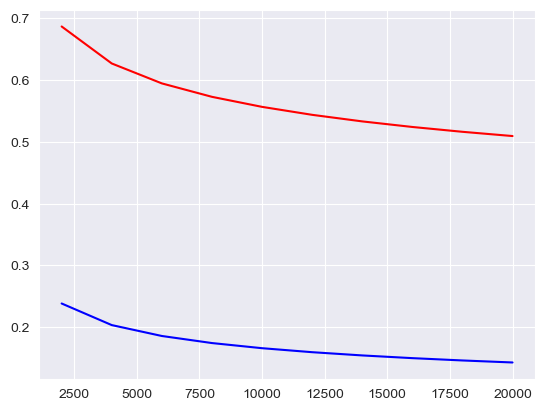

In [766]:
import matplotlib.pyplot as plt

plt.plot(times_T, wassbounds, c='r')
plt.plot(times_T, voghtbounds, c='b')

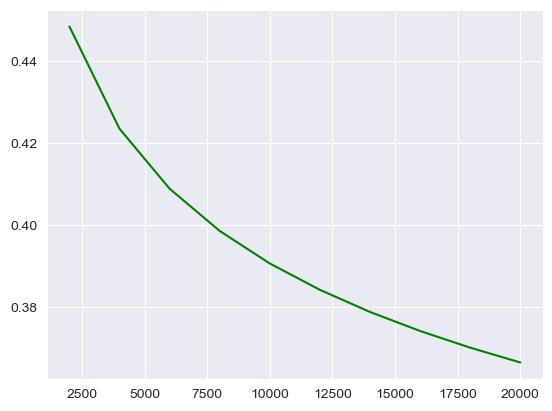

In [767]:
plt.plot(times_T, wassbounds - voghtbounds, c='g')